### Predicting Customer Purchase Expensive Products USING KNN

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Applying EDA

In [2]:
#importing the dataset
df=pd.read_csv('data.csv')
df.head()

,Age,Salary,Experience,Education Level,City,Buys Expensive Product,Noise Column 1,Noise Column 2
0,56,1487780.0,22.0,PhD,New York,1.0,noise2,-0.362757
1,69,82292.0,28.0,Masters,New York,1.0,noise1,-0.551561
2,46,43833.0,17.0,Masters,Los Angeles,0.0,noise1,-1.343872
3,32,24158.0,30.0,Masters,New York,1.0,noise2,0.850678
4,60,NaN,29.0,Masters,New York,1.0,noise2,-1.055926


In [3]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   Salary                  970 non-null    float64
 2   Experience              950 non-null    float64
 3   Education Level         1000 non-null   object 
 4   City                    1000 non-null   object 
 5   Buys Expensive Product  990 non-null    float64
 6   Noise Column 1          1000 non-null   object 
 7   Noise Column 2          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
#checking the missing values
df.isnull().sum()

,0
Age,0
Salary,30
Experience,50
Education Level,0
City,0
Buys Expensive Product,10
Noise Column 1,0
Noise Column 2,0


In [5]:
#Check the unique values
df.nunique()

,0
Age,62
Salary,968
Experience,40
Education Level,4
City,4
Buys Expensive Product,2
Noise Column 1,3
Noise Column 2,1000


In [6]:
#Categorical feature exploration
df.describe(include='object')

,Education Level,City,Noise Column 1
count,1000,1000,1000
unique,4,4,3
top,PhD,New York,noise3
freq,273,266,358


In [7]:
#Target Variable Distribution
df['Buys Expensive Product'].value_counts()

,count
Buys Expensive Product,
1.0,634
0.0,356


In [8]:
Q1 = df[['Age', 'Salary', 'Experience']].quantile(0.25)
Q3 = df[['Age', 'Salary', 'Experience']].quantile(0.75)
IQR = Q3 - Q1
print("\nPotential outliers detected in numerical features using IQR:")
outliers = ((df[['Age', 'Salary', 'Experience']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary', 'Experience']] > (Q3 + 1.5 * IQR)))
print(outliers.sum())


Potential outliers detected in numerical features using IQR:
Age            0
Salary        20
Experience     0
dtype: int64


In [9]:
#Check the correlation between 'Age', 'Salary', 'Experience'
df[['Age', 'Salary', 'Experience']].corr()

,Age,Salary,Experience
Age,1.000000,-0.044855,-0.030490
Salary,-0.044855,1.000000,-0.017215
Experience,-0.030490,-0.017215,1.000000


In [10]:
#Check the duplication of the rows
df.duplicated().sum()

0

In [11]:
#general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   Salary                  970 non-null    float64
 2   Experience              950 non-null    float64
 3   Education Level         1000 non-null   object 
 4   City                    1000 non-null   object 
 5   Buys Expensive Product  990 non-null    float64
 6   Noise Column 1          1000 non-null   object 
 7   Noise Column 2          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [12]:
def classify_column_types(df):
    # Continuous columns (numerical columns with many unique values)
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
    continuous = [col for col in continuous_columns if df[col].nunique() > 20]  # Assuming > 20 unique values makes it continuous

    # Discrete columns (numerical columns with fewer unique values)
    discrete = [col for col in continuous_columns if df[col].nunique() <= 20]

    # Categorical columns (non-numerical or few unique values)
    categorical = df.select_dtypes(include=['object']).columns.tolist()

    # Binary or categorical target
    target = ['Buys Expensive Product']  # Replace with the name of the target column

    # Print the classification of columns
    print(f"Continuous columns: {continuous}")
    print(f"Discrete columns: {discrete}")
    print(f"Categorical columns: {categorical}")
    print(f"Target column: {target}")

# Call the function on the dataframe
classify_column_types(df)


Continuous columns: ['Age', 'Salary', 'Experience', 'Noise Column 2']
Discrete columns: ['Buys Expensive Product']
Categorical columns: ['Education Level', 'City', 'Noise Column 1']
Target column: ['Buys Expensive Product']


### DATA VISUALIZATION


*univarate ANALYSIS*

Bar plots for categorical variables:


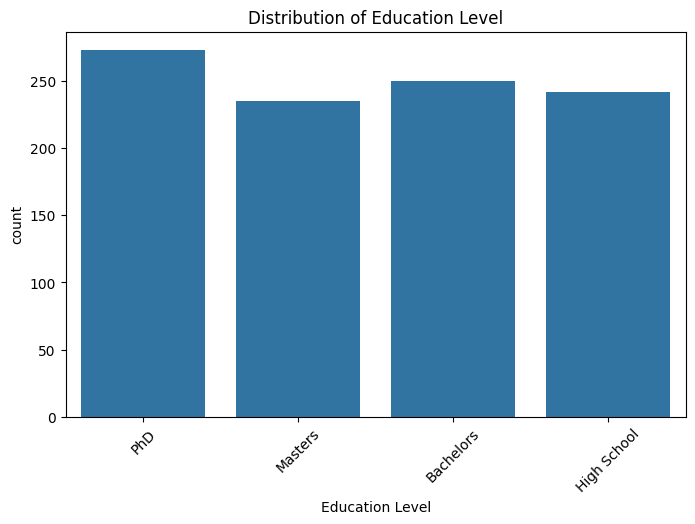

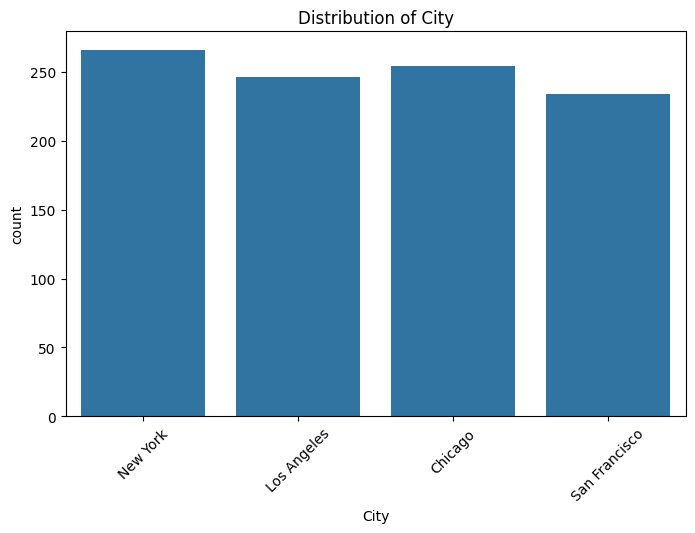

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots for categorical variables
categorical_columns = ['Education Level', 'City']  # Add other categorical columns as necessary

print("Bar plots for categorical variables:")
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()



Count plots for discrete variables:


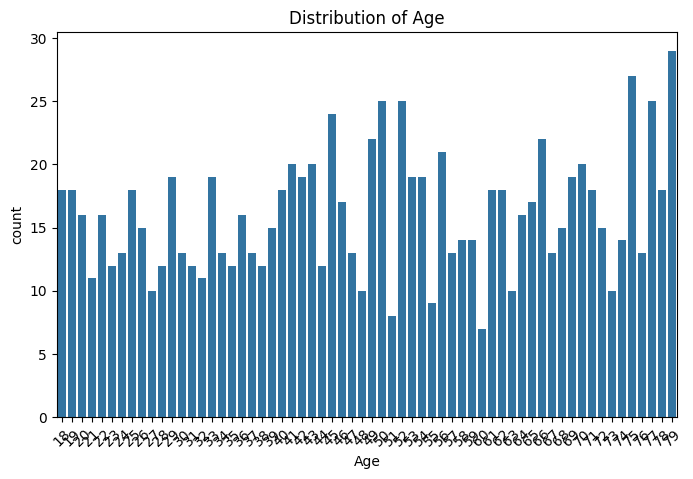

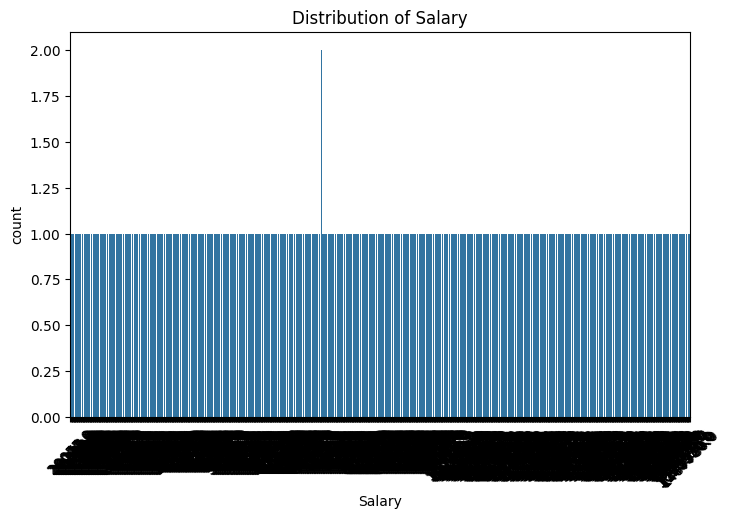

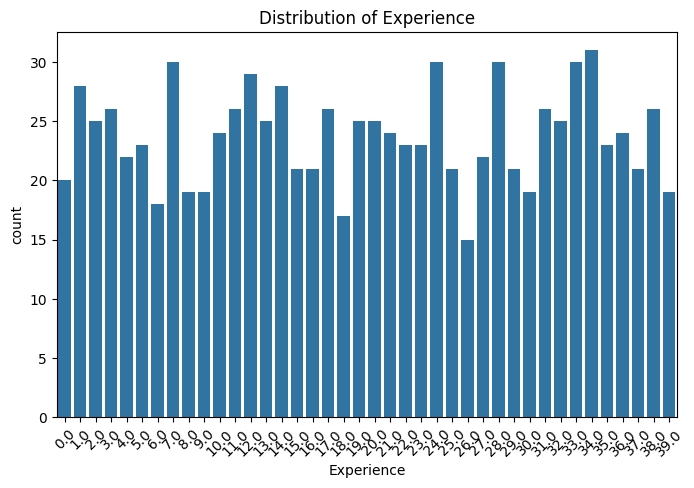

In [14]:
# Count plots for discrete variables
discrete_columns = ['Age', 'Salary', 'Experience']  # Add other discrete columns as necessary

print("\nCount plots for discrete variables:")
for col in discrete_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()



Histograms for continuous variables:


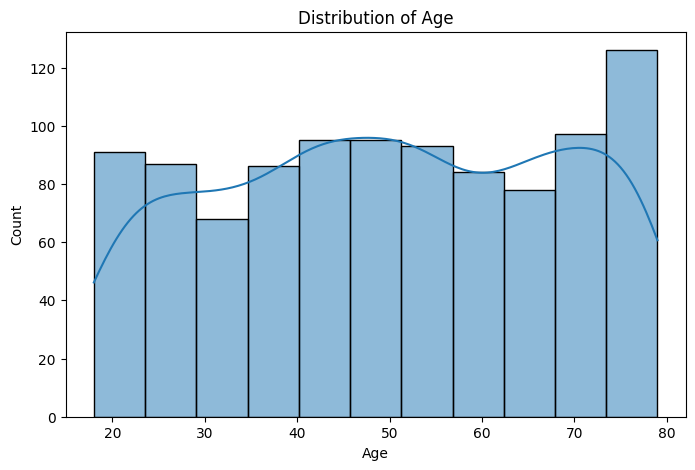

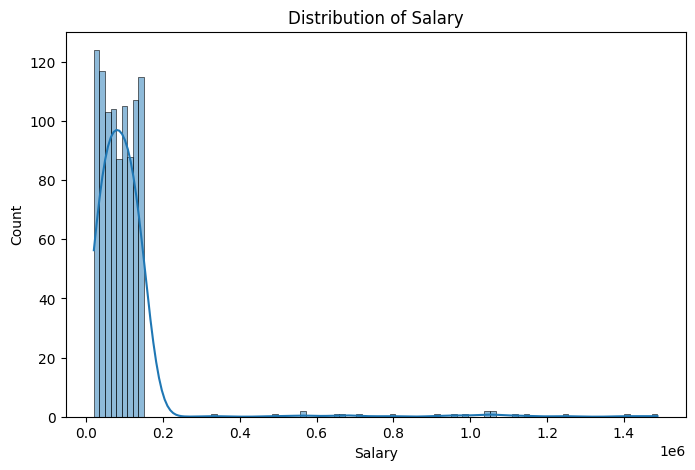

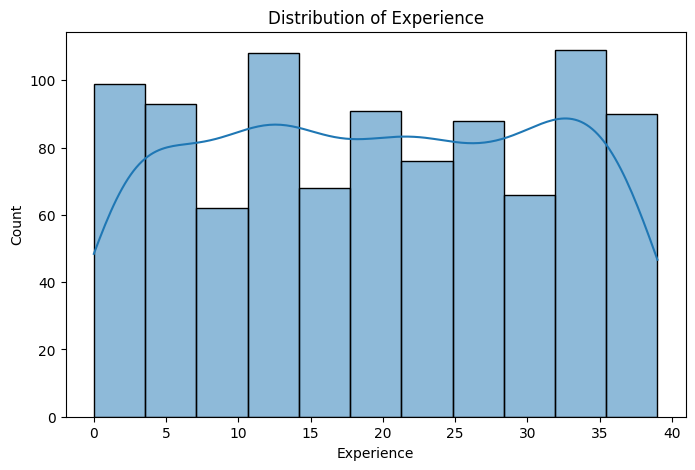

In [15]:
# Histograms for continuous variables
continuous_columns = ['Age', 'Salary', 'Experience']  # Add other continuous columns as necessary

print("\nHistograms for continuous variables:")
for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {col}')
    plt.show()


<Figure size 800x500 with 0 Axes>

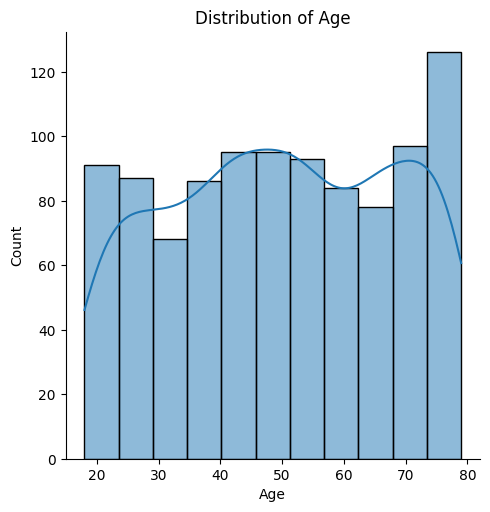

<Figure size 800x500 with 0 Axes>

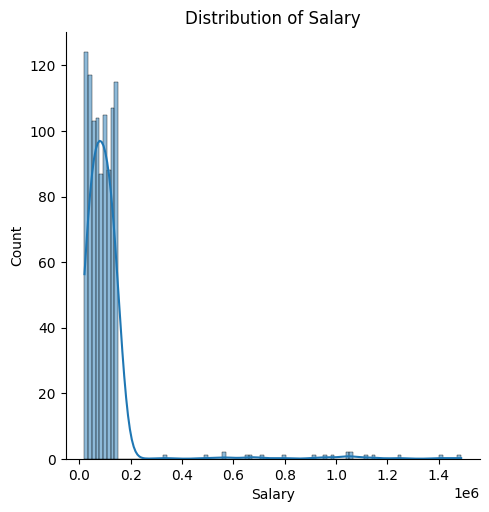

<Figure size 800x500 with 0 Axes>

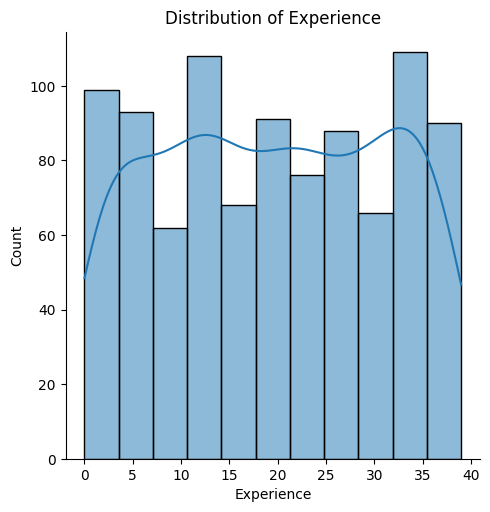

In [16]:
# Distribution Plots for All Continuous Variables
continuous_columns = ['Age', 'Salary', 'Experience']

for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


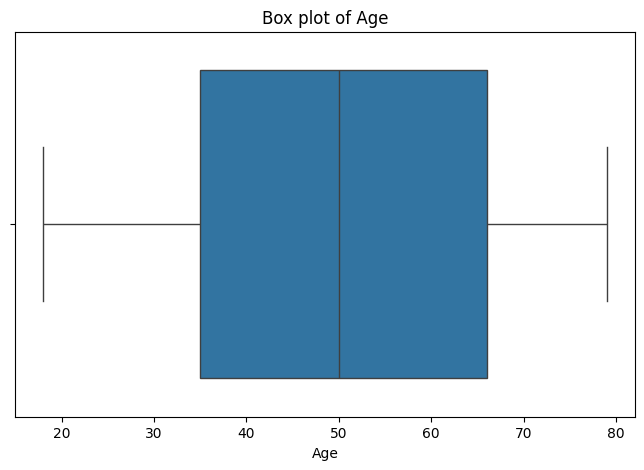

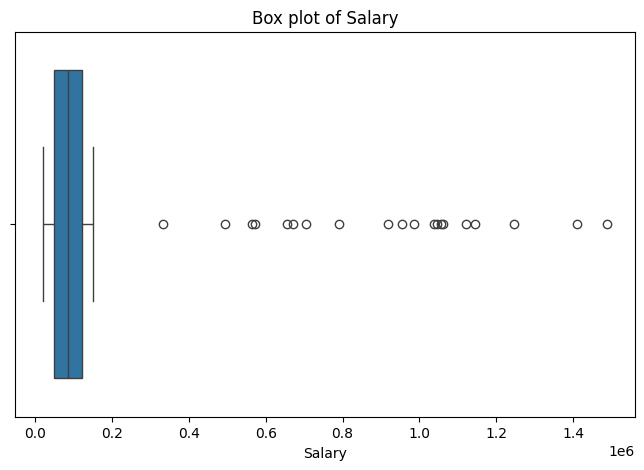

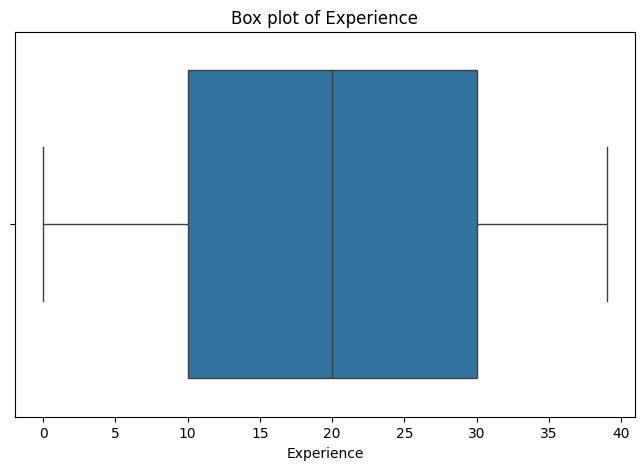

In [17]:
# Box plots for continuous variables
continuous_columns = ['Age', 'Salary', 'Experience']

for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.show()


## Bi-variate analysis

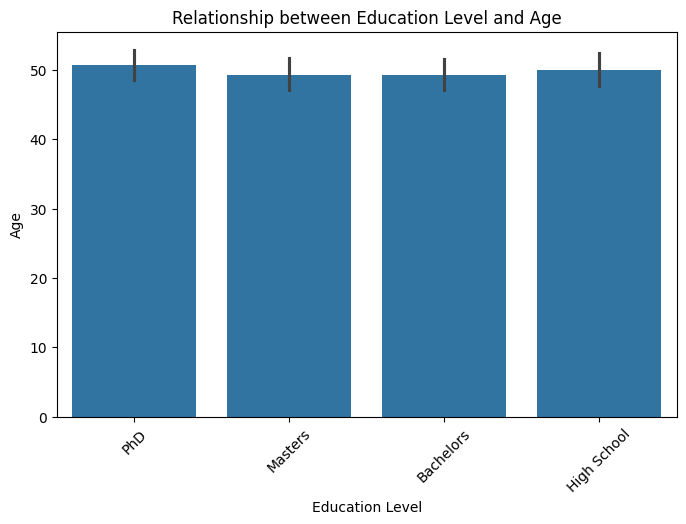

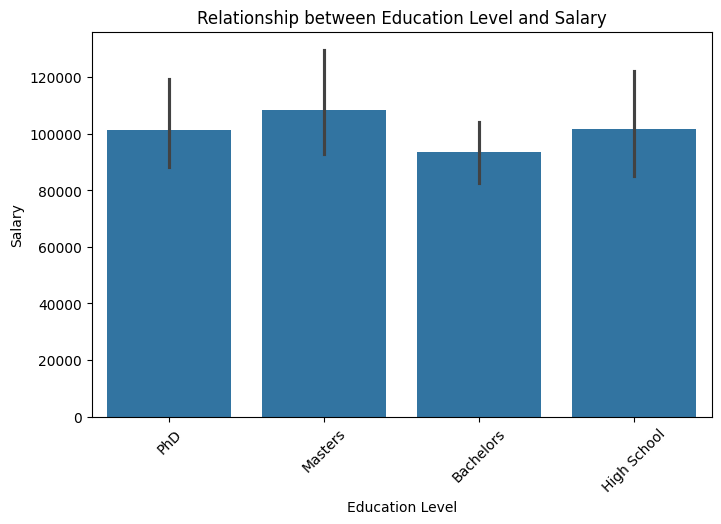

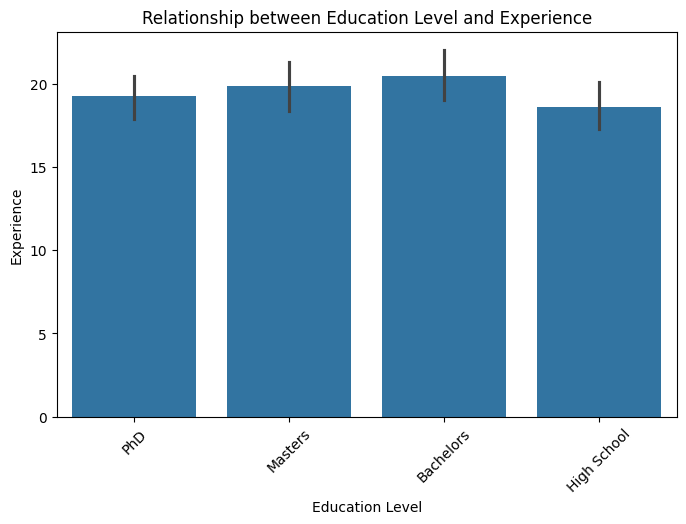

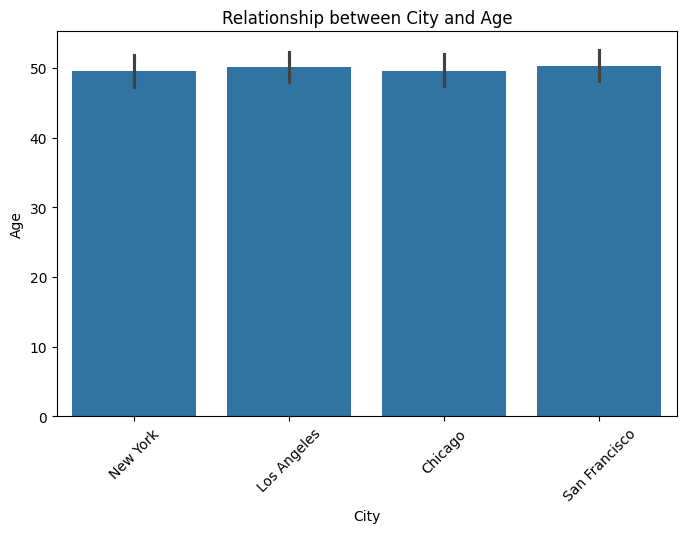

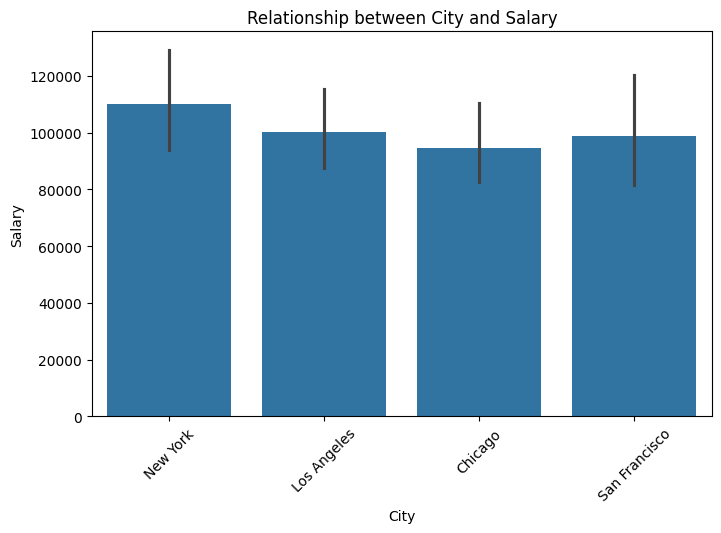

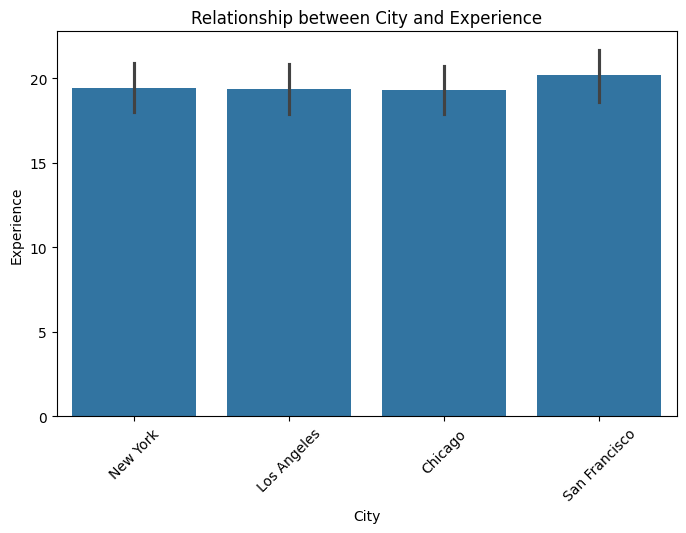

In [18]:
# Bar Plots of All Continuous and Categorical Variables
for cat_col in ['Education Level', 'City']:
    for con_col in ['Age', 'Salary', 'Experience']:
        plt.figure(figsize=(8, 5))
        sns.barplot(data=df, x=cat_col, y=con_col)
        plt.title(f'Relationship between {cat_col} and {con_col}')
        plt.xticks(rotation=45)
        plt.show()


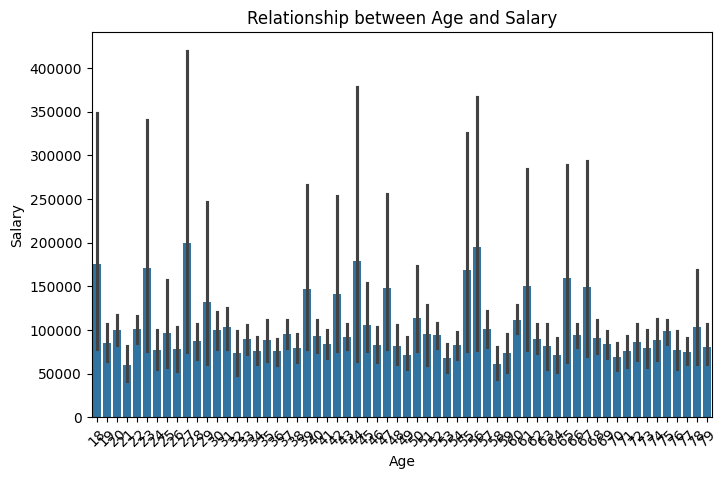

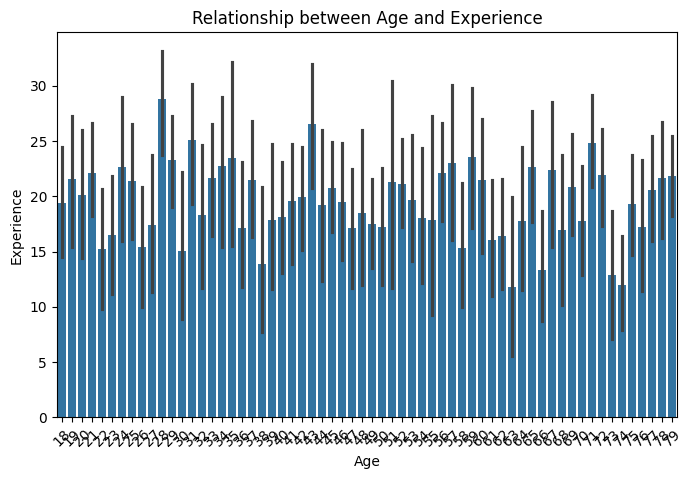

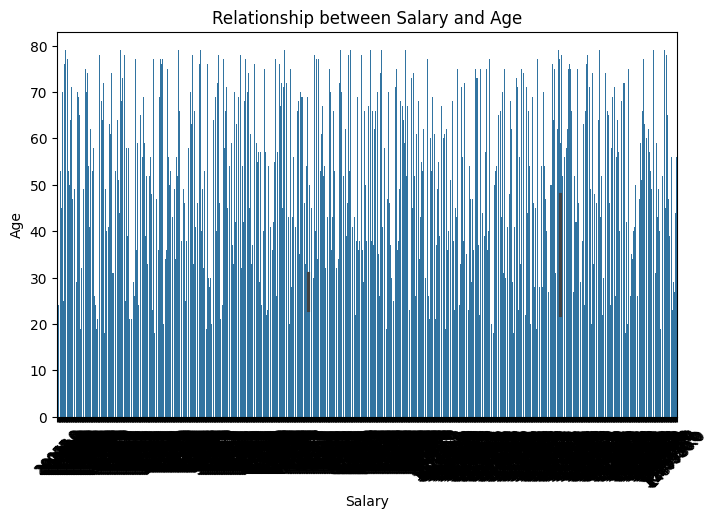

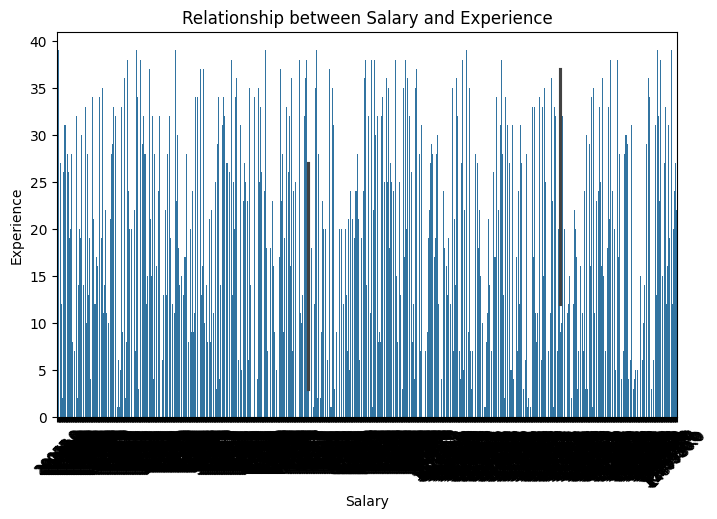

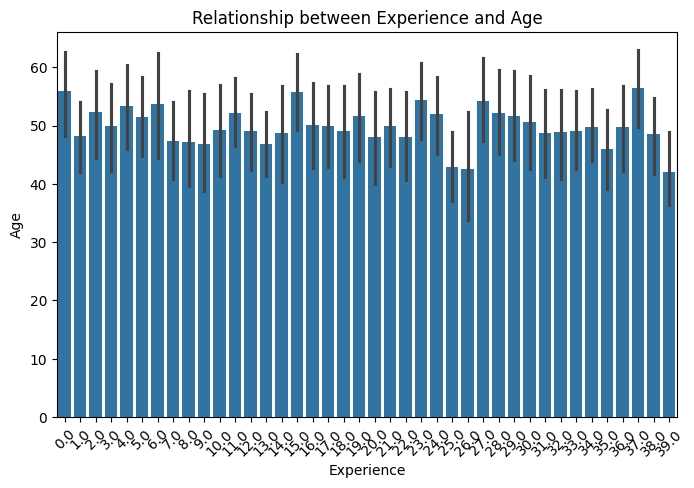

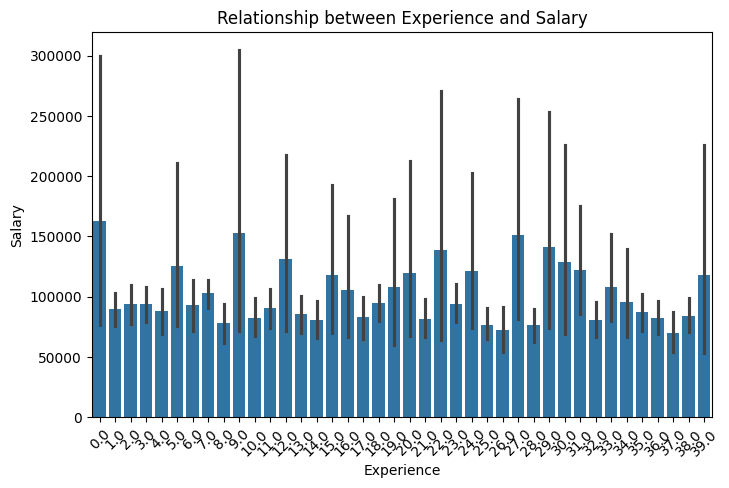

In [19]:
#Bar Plots of All Continuous and Discrete Variables

for dis_col in ['Age', 'Salary', 'Experience']:
    for con_col in ['Age', 'Salary', 'Experience']:
        if dis_col != con_col:
            plt.figure(figsize=(8, 5))
            sns.barplot(data=df, x=dis_col, y=con_col)
            plt.title(f'Relationship between {dis_col} and {con_col}')
            plt.xticks(rotation=45)
            plt.show()


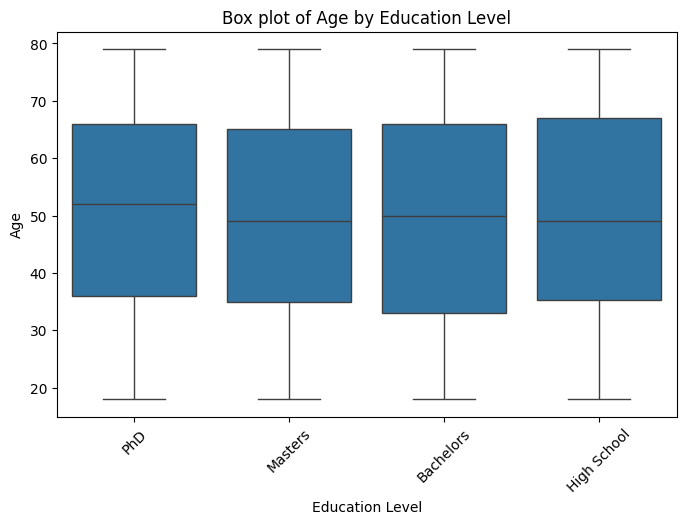

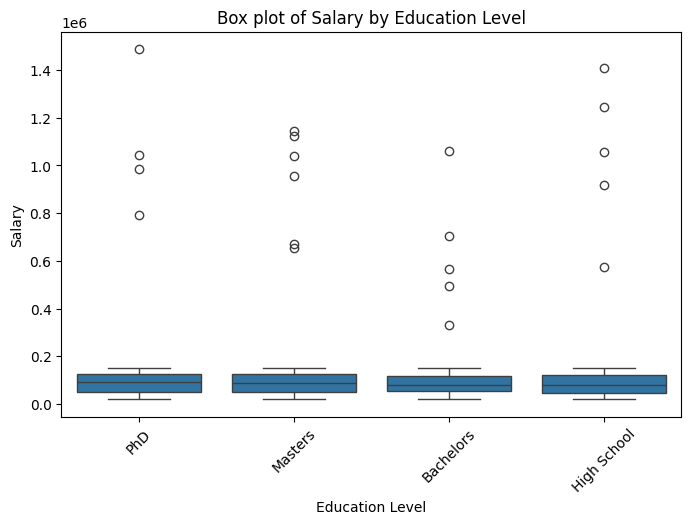

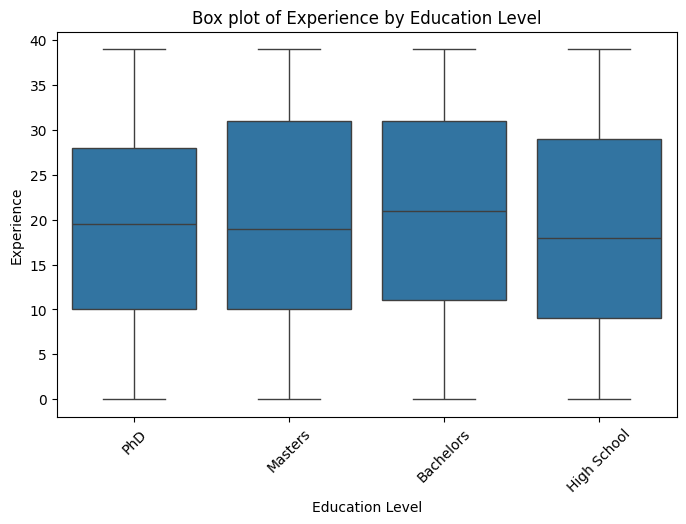

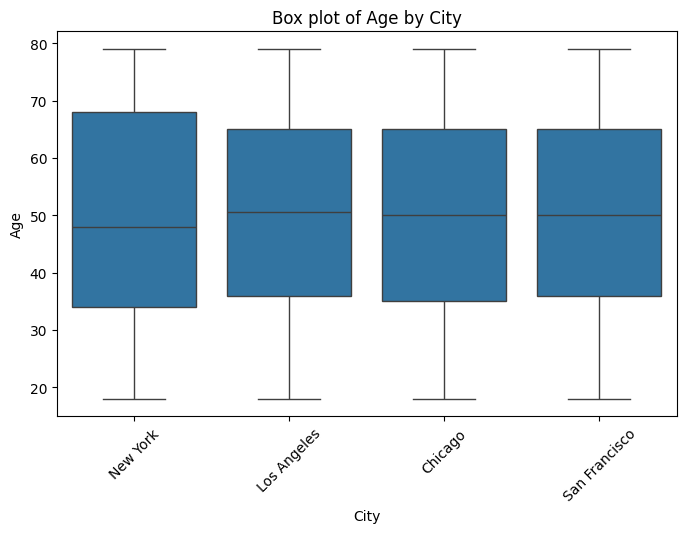

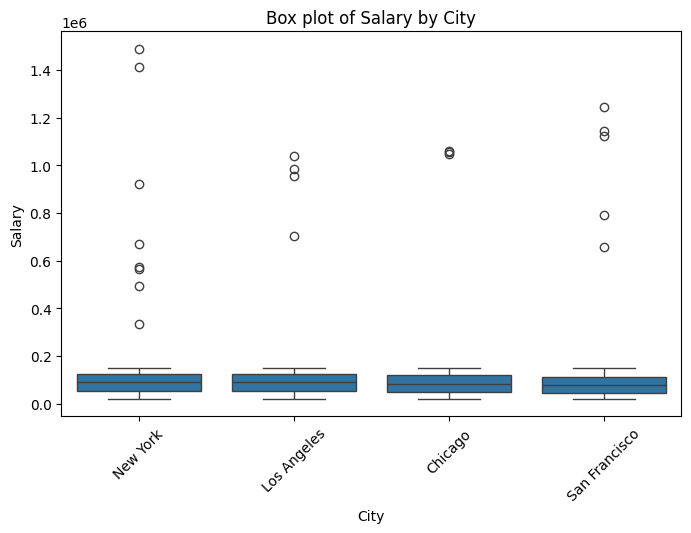

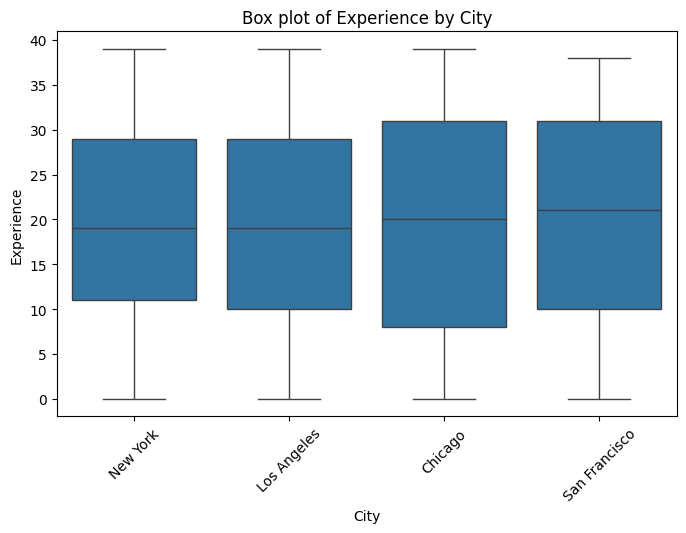

In [20]:
#Box Plots of All Continuous and Categorical Variables

for cat_col in ['Education Level', 'City']:
    for con_col in ['Age', 'Salary', 'Experience']:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=cat_col, y=con_col)
        plt.title(f'Box plot of {con_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()


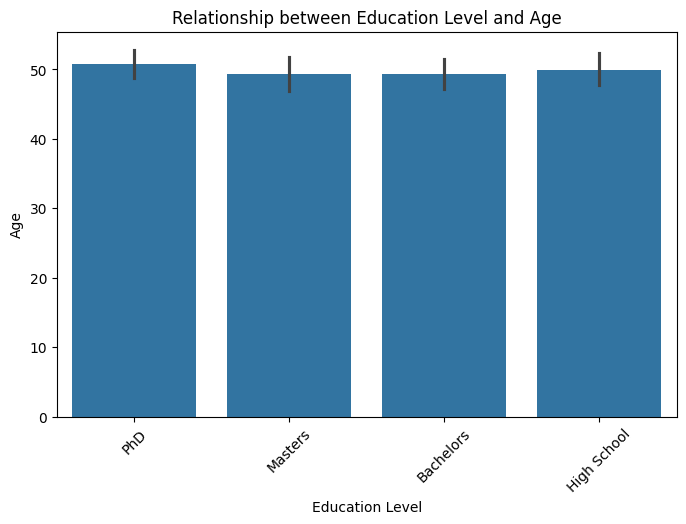

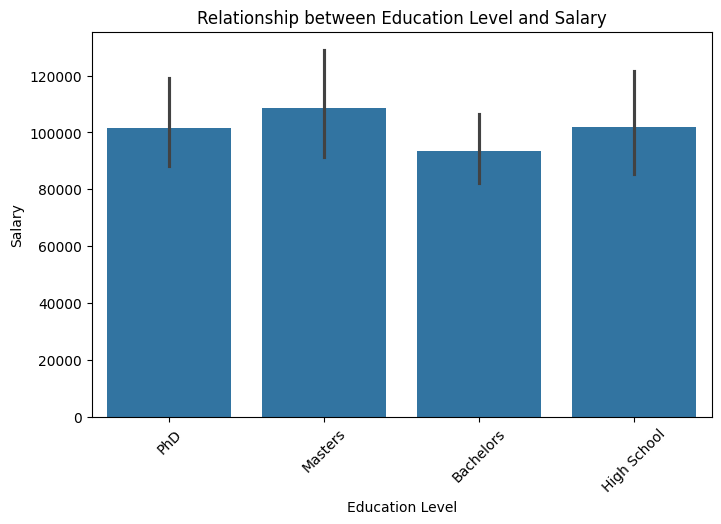

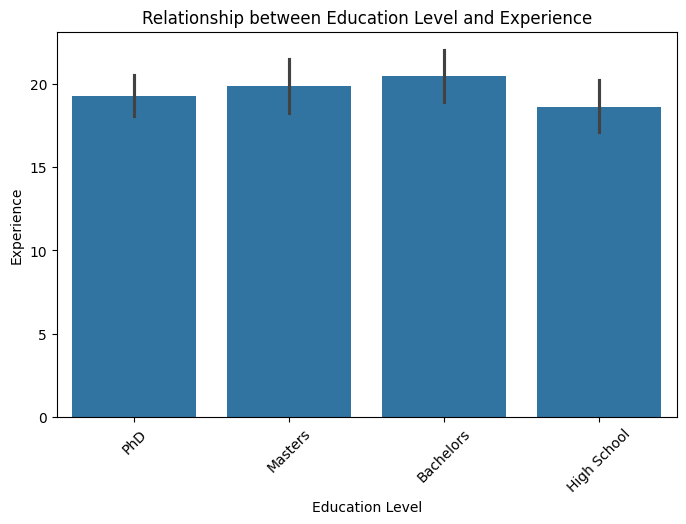

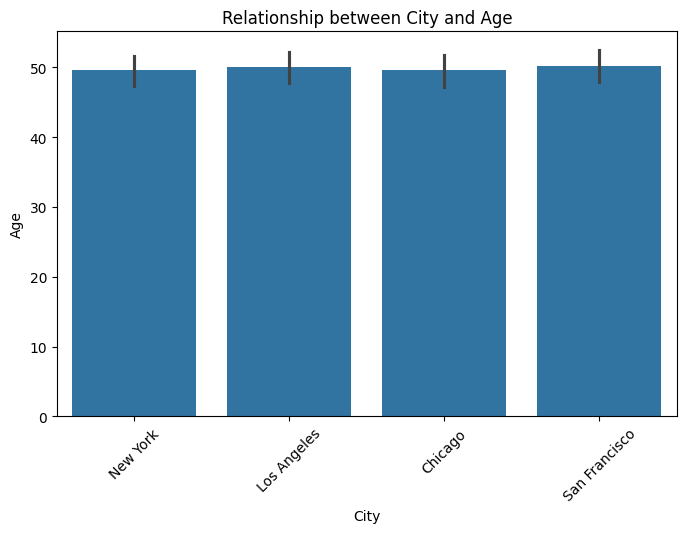

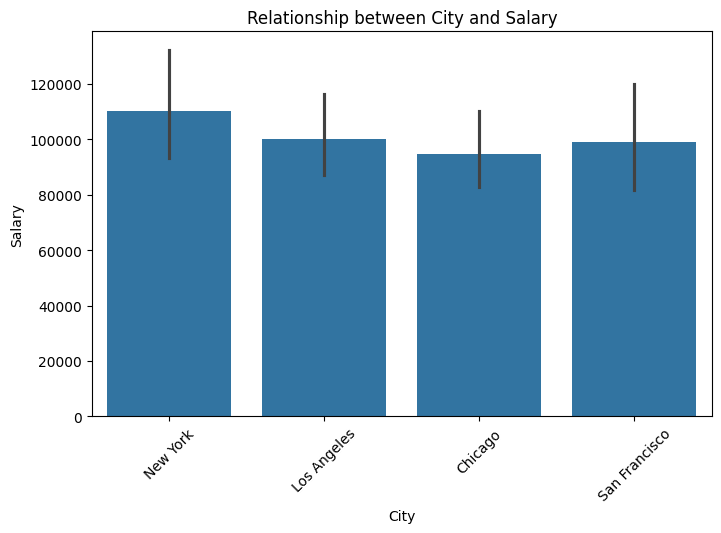

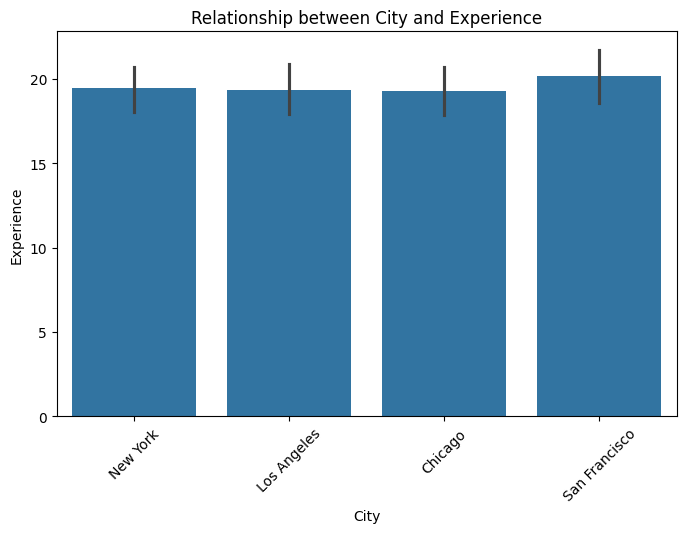

In [21]:
# Bar Plots of All Categorical and Discrete Variables
for cat_col in ['Education Level', 'City']:
    for dis_col in ['Age', 'Salary', 'Experience']:
        plt.figure(figsize=(8, 5))
        sns.barplot(data=df, x=cat_col, y=dis_col)
        plt.title(f'Relationship between {cat_col} and {dis_col}')
        plt.xticks(rotation=45)
        plt.show()


In [22]:
#Print correlation matrix of all continuous variables
continuous_cols = ['Age', 'Salary', 'Experience']
correlation_matrix = df[continuous_cols].corr()
print(correlation_matrix)


                 Age    Salary  Experience
Age         1.000000 -0.044855   -0.030490
Salary     -0.044855  1.000000   -0.017215
Experience -0.030490 -0.017215    1.000000


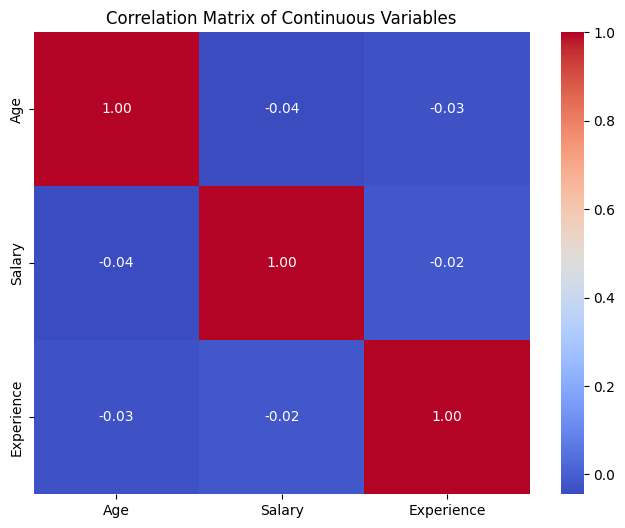

In [23]:
# Correlation matrix for continuous variables
plt.figure(figsize=(8, 6))
corr_matrix_continuous = df[continuous_columns].corr()
sns.heatmap(corr_matrix_continuous, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()


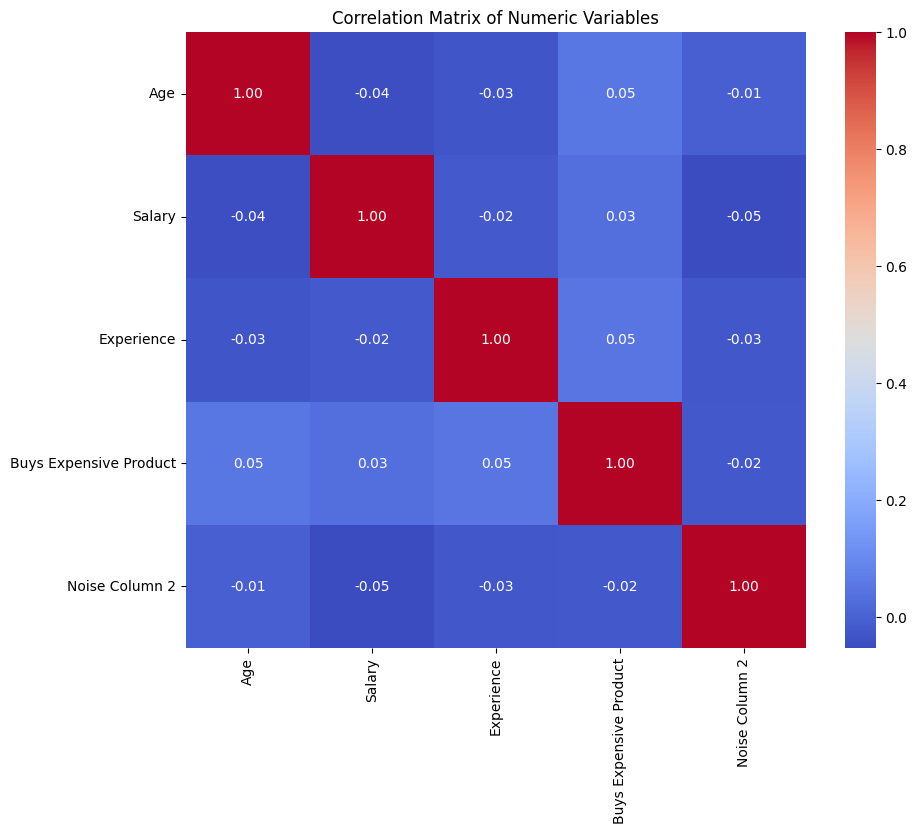

In [24]:
# Correlation matrix for all numeric variables
plt.figure(figsize=(10, 8))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
corr_matrix_all = df[numeric_columns].corr()
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


### FEATURE Engineering


In [25]:
# Impute missing values for 'Experience' and 'Salary' using the mean strategy
!pip install scikit-learn # install the scikit-learn library that contains SimpleImputer
from sklearn.impute import SimpleImputer # Import the SimpleImputer class

imputer = SimpleImputer(strategy='mean')
df['Experience'] = imputer.fit_transform(df[['Experience']])
df['Salary'] = imputer.fit_transform(df[['Salary']])

In [26]:
# For the target variable, we can either remove rows with missing values or impute them
df['Buys Expensive Product'].fillna(df['Buys Expensive Product'].mode()[0], inplace=True)

In [27]:
# Drop Noise Columns
df.drop(['Noise Column 1', 'Noise Column 2'], axis=1, inplace=True)

#Encode Categorical Variables
df = pd.get_dummies(df, columns=['Education Level', 'City'], drop_first=True)

In [28]:
#Normalize/Standardize the Data
# Import StandardScaler
from sklearn.preprocessing import StandardScaler # This line is added to import the StandardScaler class

scaler = StandardScaler()
features = df.drop('Buys Expensive Product', axis=1)
target = df['Buys Expensive Product']

# Fit the scaler on the features and transform them
features_scaled = scaler.fit_transform(features)

# Create a new DataFrame for the scaled features
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Add the target variable back to the scaled DataFrame
df_final = pd.concat([df_scaled, target.reset_index(drop=True)], axis=1)

# Display the final cleaned dataset
print("\nFinal Cleaned Dataset Info:")
print(df_final.info())


Final Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Salary                       1000 non-null   float64
 2   Experience                   1000 non-null   float64
 3   Education Level_High School  1000 non-null   float64
 4   Education Level_Masters      1000 non-null   float64
 5   Education Level_PhD          1000 non-null   float64
 6   City_Los Angeles             1000 non-null   float64
 7   City_New York                1000 non-null   float64
 8   City_San Francisco           1000 non-null   float64
 9   Buys Expensive Product       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB
None


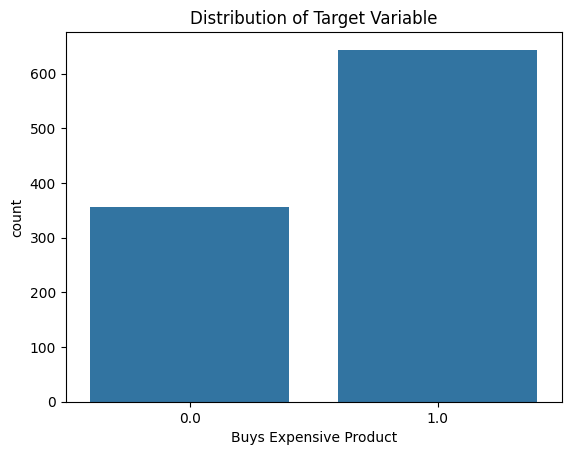

In [29]:
#Check the distribution of the target variable
sns.countplot(x='Buys Expensive Product', data=df_final)
plt.title('Distribution of Target Variable')
plt.show()

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and testing sets
X = df_final.drop('Buys Expensive Product', axis=1)  # Features
y = df_final['Buys Expensive Product']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust test_size and random_state as needed

# Choose the optimal k value based on the elbow method
optimal_k = 5  # Replace this with the k value you found from the elbow plot

# Train the KNN model with the optimal k
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

# Make predictions
y_pred_final = knn_final.predict(X_test)

# Evaluation
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      0.34      0.37        64
         1.0       0.71      0.76      0.73       136

    accuracy                           0.62       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.61      0.62      0.62       200

Confusion Matrix:
[[ 22  42]
 [ 33 103]]


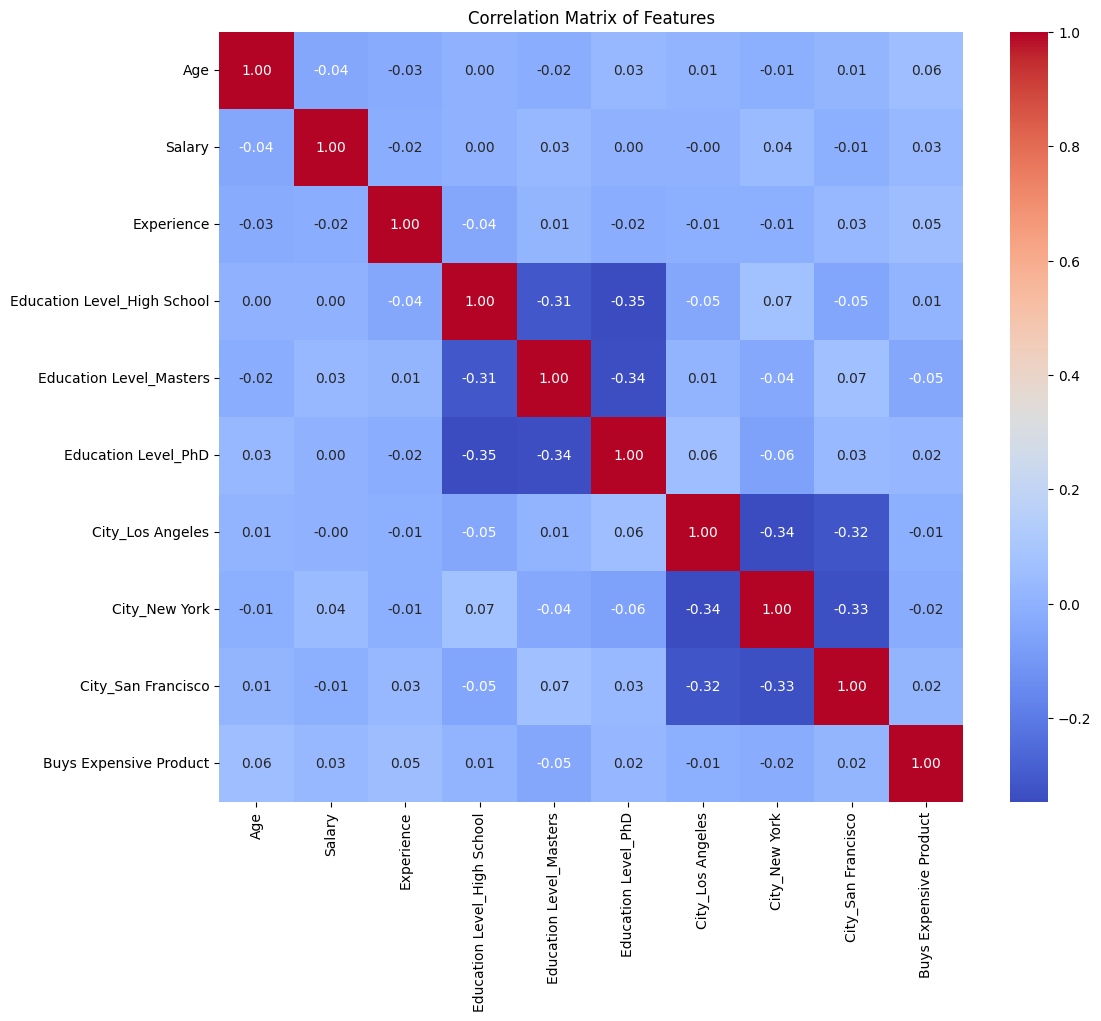


Correlation with Target Variable:
Buys Expensive Product         1.000000
Age                            0.056418
Experience                     0.050007
Salary                         0.029516
Education Level_PhD            0.024321
City_San Francisco             0.016299
Education Level_High School    0.010494
City_Los Angeles              -0.011755
City_New York                 -0.020343
Education Level_Masters       -0.046006
Name: Buys Expensive Product, dtype: float64


In [31]:
# Assuming df_final is your final DataFrame with scaled features and target
correlation_matrix = df_final.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# You can also specifically look at the correlation with the target variable:
print("\nCorrelation with Target Variable:")
print(correlation_matrix['Buys Expensive Product'].sort_values(ascending=False))

In [33]:
#Decision tree algorithm for the dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)  # You can adjust parameters like max_depth, min_samples_split, etc.

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# You can also print classification report and confusion matrix for Decision Tree
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.565
Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.36      0.47      0.41        64
         1.0       0.71      0.61      0.66       136

    accuracy                           0.56       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.60      0.56      0.58       200

Confusion Matrix (Decision Tree):
[[30 34]
 [53 83]]
Accuracy: 0.565


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.38      0.25      0.30        64
         1.0       0.70      0.81      0.75       136

    accuracy                           0.63       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.60      0.63      0.61       200

Accuracy: 0.63


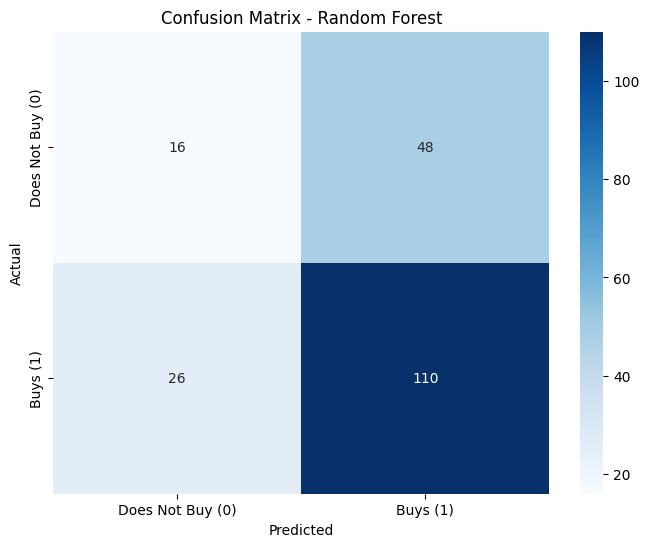

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Does Not Buy (0)', 'Buys (1)'],
            yticklabels=['Does Not Buy (0)', 'Buys (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.68      1.00      0.81       136

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



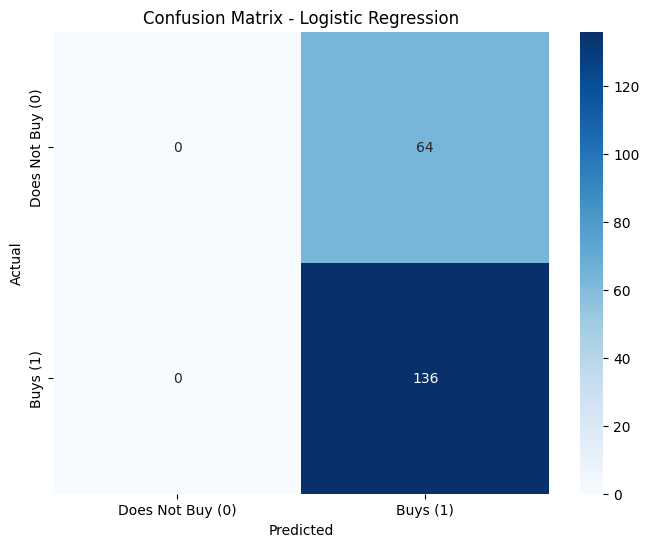

Accuracy: 0.68


In [36]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression Classifier
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Does Not Buy (0)', 'Buys (1)'],
            yticklabels=['Does Not Buy (0)', 'Buys (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_log))


In [ ]:
# prompt: save this model in pkl file

import pickle

# Assuming 'rf_model' is your trained Random Forest model
filename = 'random_forest_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

print(f"Model saved to {filename}")


Model saved to random_forest_model.pkl


In [ ]:
# prompt: generate a python code for deploying this model on streamlit

# Import necessary libraries
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
filename = 'random_forest_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

# Define the Streamlit app
def main():
    st.title("Customer Purchase Prediction App")

    # Create input fields for user data
    age = st.number_input("Enter Age:", min_value=18, max_value=100, value=25)
    salary = st.number_input("Enter Salary:", min_value=0, value=50000)
    experience = st.number_input("Enter Experience:", min_value=0, value=5)
    education_level_masters = st.selectbox("Education Level", ["Bachelor", "Masters"], index=0)
    city_newyork = st.selectbox("City", ["London", "New York"], index=0)


    # Create a button to predict
    if st.button("Predict"):
        # Prepare the input data for the model
        input_data = pd.DataFrame({
            "Age": [age],
            "Salary": [salary],
            "Experience": [experience],
            "Education Level_Masters": [1 if education_level_masters == "Masters" else 0],
            "City_New York": [1 if city_newyork == "New York" else 0],
        })

        # Make a prediction using the loaded model
        prediction = loaded_model.predict(input_data)

        # Display the prediction
        if prediction[0] == 1:
            st.success("The customer is likely to buy expensive products.")
        else:
            st.warning("The customer is likely not to buy expensive products.")


if __name__ == "__main__":
    main()
